<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import os
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [6]:
import sys
sys.path.append('/Documentos/Academico/ITAM/DataS/Modulo4/machine-learning/files/')
import utils

In [7]:
#pipeline llamado model
#polinomio de grado 30 (sin incluir p0) 
#regresión logística sin regularización (LogisticRegression(penalty="none")

model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("Logreg", LogisticRegression(solver='lbfgs',penalty = 'none', max_iter=1e6))  
])

In [19]:
#Bagging Classifer de model llamado bagging_logreg con n_estimators=100 y random_state=314
n_estimators=100
random_state=314
bagging_logreg_tree = BaggingClassifier(n_estimators=n_estimators,random_state=random_state)
bagging_logreg = BaggingClassifier(model, n_estimators=n_estimators,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=random_state)

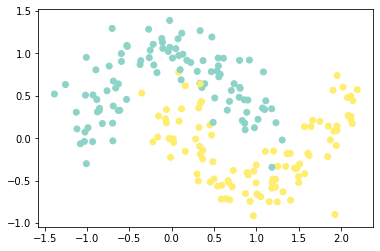

In [20]:
#Entrena model y bagging_logreg considerando X y y definido arriba
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,random_state=31415)
plt.scatter(*X.T, c=y,cmap="Set3")

In [21]:
m = model.fit(X, y)
blr = bagging_logreg.fit(X, y)

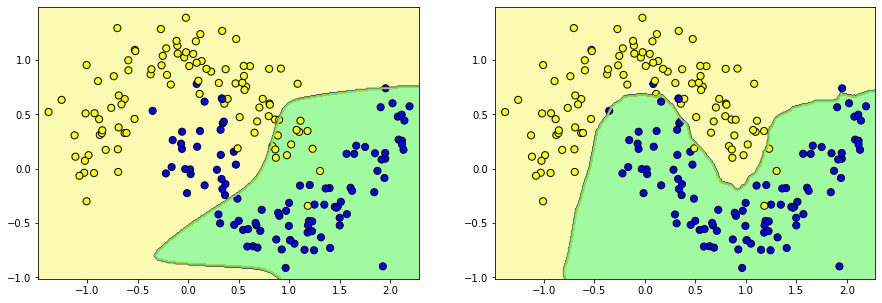

In [22]:
#Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [23]:
#Considerando un f1_score (dentro de sklearn.metrics), 
#calcula el f1-score sobre el test set (X_test, y_test) 
#considerando model y bagging_logreg. ¿Qué resultados arroja?
y_hat_m = model.predict(X_test)
y_hat_blr = bagging_logreg.predict(X_test)
print(f'F1 de model = {f1_score(y_test, y_hat_m)}')
print(f'F1 de bagging_logreg = {f1_score(y_test, y_hat_blr)}')

F1 de model = 0.7567567567567567
F1 de bagging_logreg = 0.9500000000000001
